In [35]:
# Import libraries
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.optim import optimize_acqf
from botorch.acquisition import UpperConfidenceBound
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.kernels import ScaleKernel, RBFKernel
from botorch.models.transforms.outcome import OutcomeTransform, Standardize
from botorch.models.transforms.input import InputTransform, Normalize


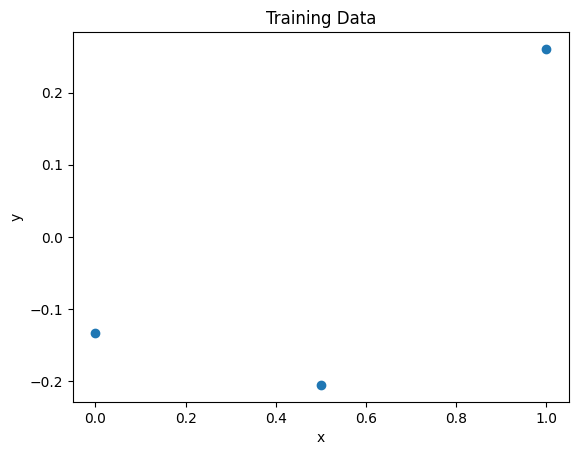

In [36]:
# Generate synthetic data
train_x = torch.linspace(0, 1, 3).unsqueeze(-1).float()
train_y = torch.sin(train_x * (2 * torch.pi)).float() + 0.2 * torch.randn_like(train_x).float()

# Plot the training data
import matplotlib.pyplot as plt

plt.plot(train_x.numpy(), train_y.numpy(), 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()


In [37]:
# Initialize the Gaussian Process model




gp_model = SingleTaskGP(train_x, train_y, outcome_transform=Standardize(m=1), input_transform=Normalize(d=1))
gp_model_2 = SingleTaskGP(train_x, train_y, outcome_transform=Standardize(m=1), input_transform=Normalize(d=1))

# Marginal log likelihood for Gaussian Processes
mll = ExactMarginalLogLikelihood(gp_model.likelihood, gp_model)

c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\models\gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


In [38]:
print(gp_model.mean_module)
print(gp_model.mean_module.constant.item())

ConstantMean()
0.0


In [39]:
fit_gpytorch_mll(mll)

ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): GammaPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): SingleTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): GammaPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (lengthscale_prior): GammaPrior()
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
    (outcome_transform): Standardize()
    (input_transform): Normalize()
  )
)

In [40]:
print(gp_model.mean_module)
print(gp_model.mean_module.constant.item())

ConstantMean()
0.07430478930473328


In [41]:
print(gp_model_2.mean_module)
print(gp_model_2.mean_module.constant.item())

ConstantMean()
0.0


In [51]:
import numpy as np

import matplotlib.pyplot as plt


def plot_gp_and_acquisition(model, train_X, train_Y, bounds, ax=None):
    # Set model to eval mode
    model.eval()

    # Define points for plotting
    with torch.no_grad():
        # Range of points for plotting
        test_x = torch.linspace(bounds[0, 0], bounds[1, 0], 100).unsqueeze(-1)  # Corrected access here
        test_x = test_x.to(train_X.device, dtype=train_X.dtype)
        test_x = test_x.unsqueeze(-2)  # Add batch dimension for acquisition function
        posterior = model.posterior(test_x)
        mean = posterior.mean.squeeze(-1)
        # Get lower and upper confidence bounds (2 standard deviations)
        lower, upper = posterior.mvn.confidence_region()

    # For plotting, remove the batch dimension
    test_x_plot = test_x.squeeze(-2).detach()  # Adjust shape for plotting

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(train_X.cpu().numpy(), train_Y.cpu().numpy(), 'ko')
    ax.plot(test_x_plot.cpu().numpy(), mean.cpu().numpy(), 'b')
    ax.fill_between(test_x_plot.cpu().numpy().flatten(), lower.cpu().numpy().flatten(), upper.cpu().numpy().flatten(), alpha=0.5)  # Flatten the tensors to make them 1D
    ax.set_title("Gaussian Process and Observed Data")
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

    plt.show()

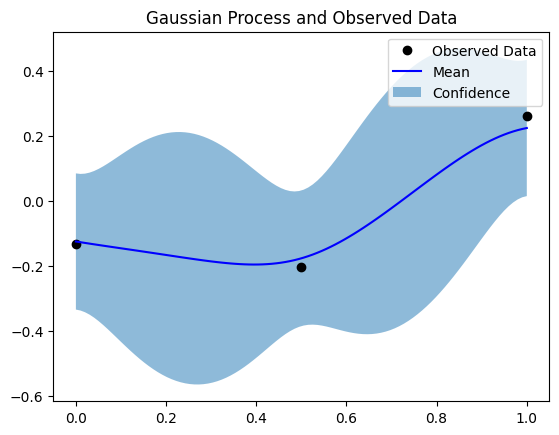

In [52]:
plot_gp_and_acquisition(gp_model, train_x, train_y, torch.tensor([[0.0], [1.0]]))

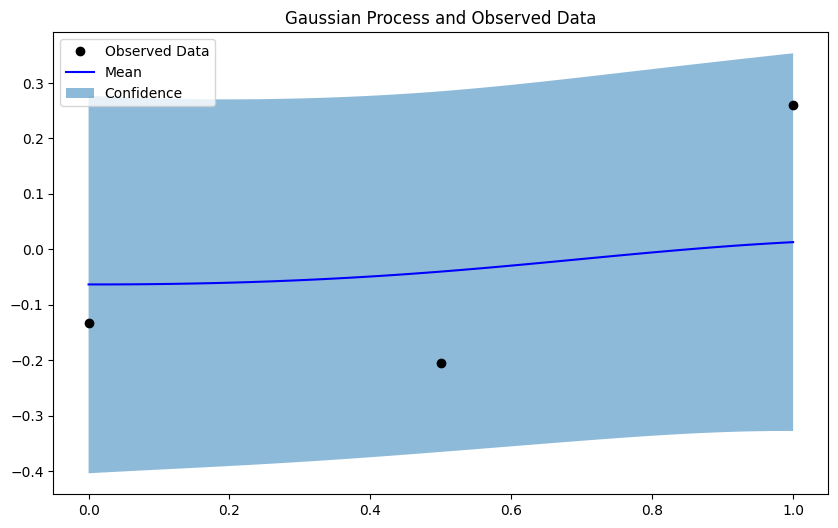

In [44]:
plot_gp_and_acquisition(gp_model_2, train_x, train_y, torch.tensor([[0.0], [1.0]]))

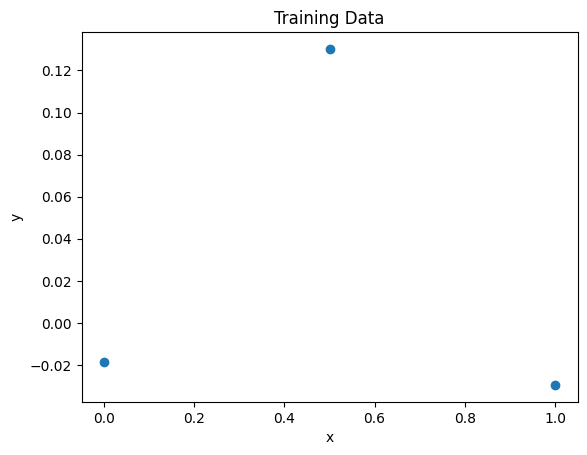

c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\models\gp_regression.py:161: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  self._validate_tensor_args(X=transformed_X, Y=train_Y, Yvar=train_Yvar)


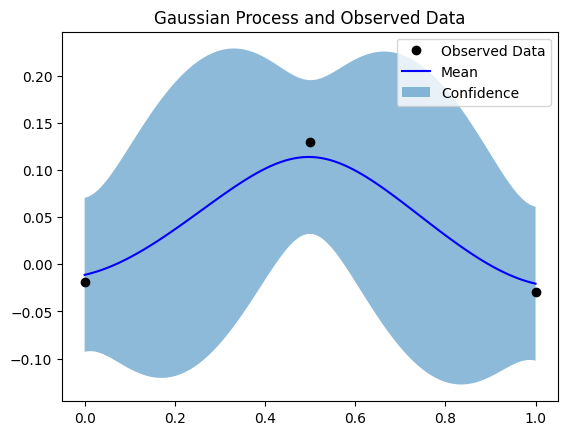

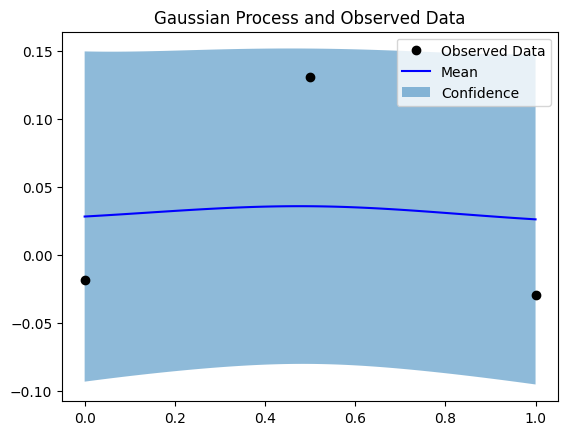

In [54]:
# Generate synthetic data
train_x = torch.linspace(0, 1, 3).unsqueeze(-1).float()
train_y = torch.sin(train_x * (2 * torch.pi)).float() + 0.2 * torch.randn_like(train_x).float()

# Plot the training data
import matplotlib.pyplot as plt

plt.plot(train_x.numpy(), train_y.numpy(), 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

# Initialize the Gaussian Process model




gp_model = SingleTaskGP(train_x, train_y, outcome_transform=Standardize(m=1), input_transform=Normalize(d=1))
gp_model_2 = SingleTaskGP(train_x, train_y, outcome_transform=Standardize(m=1), input_transform=Normalize(d=1))

# Marginal log likelihood for Gaussian Processes
mll = ExactMarginalLogLikelihood(gp_model.likelihood, gp_model)

fit_gpytorch_mll(mll)

import numpy as np

import matplotlib.pyplot as plt


def plot_gp_and_acquisition(model, train_X, train_Y, bounds, ax=None):
    # Set model to eval mode
    model.eval()

    # Define points for plotting
    with torch.no_grad():
        # Range of points for plotting
        test_x = torch.linspace(bounds[0, 0], bounds[1, 0], 100).unsqueeze(-1)  # Corrected access here
        test_x = test_x.to(train_X.device, dtype=train_X.dtype)
        test_x = test_x.unsqueeze(-2)  # Add batch dimension for acquisition function
        posterior = model.posterior(test_x)
        mean = posterior.mean.squeeze(-1)
        # Get lower and upper confidence bounds (2 standard deviations)
        lower, upper = posterior.mvn.confidence_region()

    # For plotting, remove the batch dimension
    test_x_plot = test_x.squeeze(-2).detach()  # Adjust shape for plotting

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(train_X.cpu().numpy(), train_Y.cpu().numpy(), 'ko')
    ax.plot(test_x_plot.cpu().numpy(), mean.cpu().numpy(), 'b')
    ax.fill_between(test_x_plot.cpu().numpy().flatten(), lower.cpu().numpy().flatten(), upper.cpu().numpy().flatten(), alpha=0.5)  # Flatten the tensors to make them 1D
    ax.set_title("Gaussian Process and Observed Data")
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

    plt.show()

plot_gp_and_acquisition(gp_model, train_x, train_y, torch.tensor([[0.0], [1.0]]))

plot_gp_and_acquisition(gp_model_2, train_x, train_y, torch.tensor([[0.0], [1.0]]))

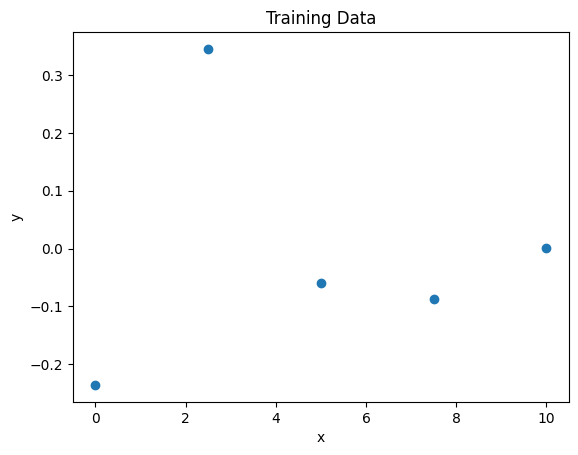

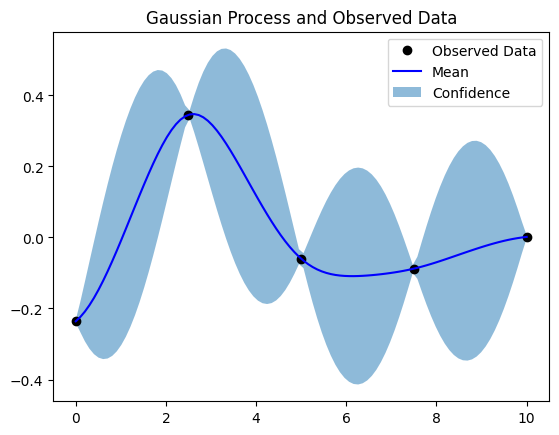

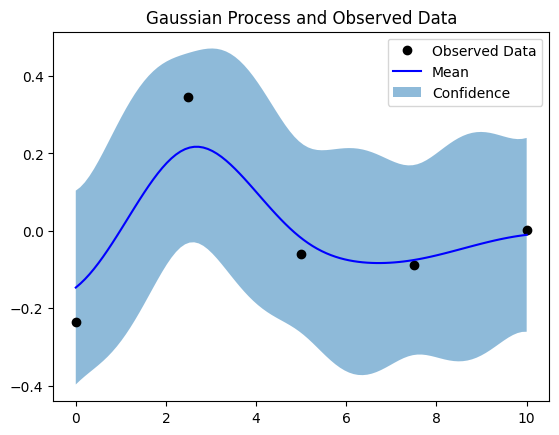

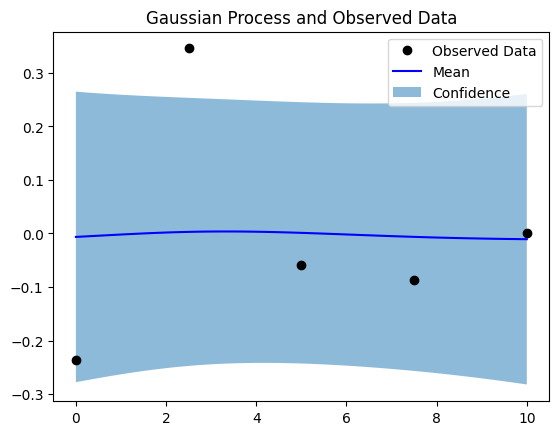

In [77]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.priors.torch_priors import NormalPrior, GammaPrior
from gpytorch.kernels import ScaleKernel, RBFKernel
from botorch.models.transforms.outcome import OutcomeTransform, Standardize
from botorch.models.transforms.input import InputTransform, Normalize

# # Generate synthetic data
train_x = torch.linspace(0, 10, 5).unsqueeze(-1).to(torch.float64)
train_y = torch.sin(train_x * (2 * torch.pi)).float() + 0.2 * torch.randn_like(train_x).to(torch.float64)

# Plot the training data
plt.plot(train_x.numpy(), train_y.numpy(), 'o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

# Define a custom kernel with Gaussian likelihood
likelihood = GaussianLikelihood(noise_prior=NormalPrior(0, 0.1))

likelihood_2 = GaussianLikelihood(noise_prior=GammaPrior(1.1, 0.05))

#Standard kernel and likelihood:
'''
Constructs the GaussianLikelihood that is used by default by
    several models. This uses a Gamma(1.1, 0.05) prior and constrains the
    noise level to be greater than MIN_INFERRED_NOISE_LEVEL (=1e-4).
Constructs the Scale-Matern kernel that is used by default by
    several models. This uses a Gamma(3.0, 6.0) prior for the lengthscale
    and a Gamma(2.0, 0.15) prior for the output scale.

'''

# Initialize the Gaussian Process model
gp_model_normal_prior = SingleTaskGP(train_x, train_y, likelihood=likelihood, input_transform=Normalize(d=1), outcome_transform=Standardize(m=1))

gp_model_standard = SingleTaskGP(train_x, train_y,input_transform=Normalize(d=1), outcome_transform=Standardize(m=1))

gp_model_no_fit = SingleTaskGP(train_x, train_y, input_transform=Normalize(d=1), outcome_transform=Standardize(m=1))

# Marginal log likelihood for Gaussian Processes
mll_normal_prior = ExactMarginalLogLikelihood(gp_model_normal_prior.likelihood, gp_model_normal_prior)

# Fit the model
fit_gpytorch_mll(mll_normal_prior)

mll_standard = ExactMarginalLogLikelihood(gp_model_standard.likelihood, gp_model_standard)

fit_gpytorch_mll(mll_standard)

def plot_gp_and_acquisition(model, train_X, train_Y, bounds, ax=None):
    model.eval()
    with torch.no_grad():
        test_x = torch.linspace(bounds[0, 0], bounds[1, 0], 100).unsqueeze(-1)
        test_x = test_x.to(train_X.device, dtype=train_X.dtype)
        posterior = model.posterior(test_x)
        mean = posterior.mean.squeeze(-1)
        lower, upper = posterior.mvn.confidence_region()

    test_x_plot = test_x.detach()

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(train_X.cpu().numpy(), train_Y.cpu().numpy(), 'ko')
    ax.plot(test_x_plot.cpu().numpy(), mean.cpu().numpy(), 'b')
    ax.fill_between(test_x_plot.cpu().numpy().flatten(), lower.cpu().numpy().flatten(), upper.cpu().numpy().flatten(), alpha=0.5)
    ax.set_title("Gaussian Process and Observed Data")
    ax.legend(['Observed Data', 'Mean', 'Confidence'])

    plt.show()

plot_gp_and_acquisition(gp_model_normal_prior, train_x, train_y, torch.tensor([[0.0], [10.0]]))

plot_gp_and_acquisition(gp_model_standard, train_x, train_y, torch.tensor([[0.0], [10.0]]))

plot_gp_and_acquisition(gp_model_no_fit, train_x, train_y, torch.tensor([[0.0], [10.0]]))


In [100]:
print(gp_model_normal_prior.mean_module.constant.item())  
print(gp_model_normal_prior.covar_module.base_kernel)

-0.0693977114934182
MaternKernel(
  (lengthscale_prior): GammaPrior()
  (raw_lengthscale_constraint): Positive()
)


In [101]:
mean_tl = gp_model_normal_prior.mean_module.constant.item()

lengthscale = gp_model_normal_prior.covar_module.base_kernel

In [102]:
transfer_GP = SingleTaskGP(train_x, train_y, input_transform=Normalize(d=1), outcome_transform=Standardize(m=1))
print(transfer_GP.mean_module.constant.item())
transfer_GP.mean_module.constant = mean_tl
transfer_GP.covar_module.base_kernel = lengthscale

0.0


In [103]:
print(transfer_GP.mean_module.constant.item())

-0.0693977102637291


In [107]:
# Generate synthetic data
train_x_n = torch.linspace(0, 1,2).unsqueeze(-1).float()
train_y_n = torch.sin(train_x_n * (2 * torch.pi)).float() + 0.2 * torch.randn_like(train_x_n).float()

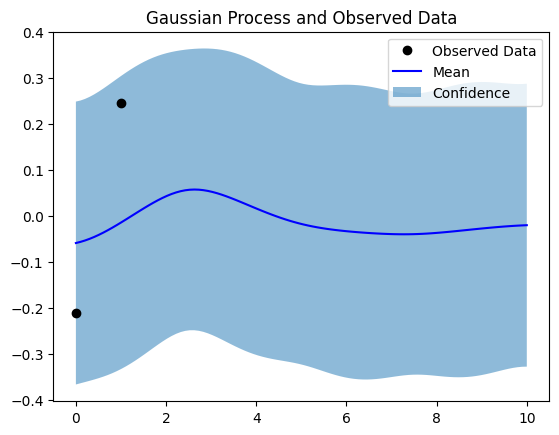

In [108]:
plot_gp_and_acquisition(transfer_GP, train_x_n, train_y_n, torch.tensor([[0.0], [10.0]]))

In [110]:
tl_likelihood = gp_model_normal_prior.likelihood

In [111]:
transfer_GP.likelihood = tl_likelihood

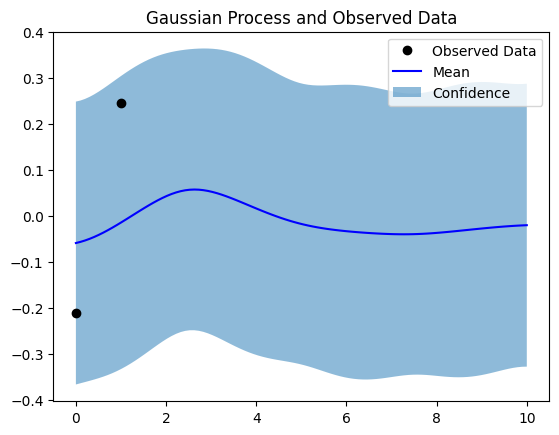

In [112]:
plot_gp_and_acquisition(transfer_GP, train_x_n, train_y_n, torch.tensor([[0.0], [10.0]]))

In [117]:
print(gp_model_normal_prior.state_dict())

OrderedDict([('likelihood.noise_covar.raw_noise', tensor([-12.8888], dtype=torch.float64)), ('likelihood.noise_covar.noise_prior.loc', tensor(0., dtype=torch.float64)), ('likelihood.noise_covar.noise_prior.scale', tensor(0.1000, dtype=torch.float64)), ('likelihood.noise_covar.raw_noise_constraint.lower_bound', tensor(1.0000e-04, dtype=torch.float64)), ('likelihood.noise_covar.raw_noise_constraint.upper_bound', tensor(inf, dtype=torch.float64)), ('mean_module.raw_constant', tensor(-0.0694, dtype=torch.float64)), ('covar_module.raw_outputscale', tensor(1.4087, dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscale', tensor([[-1.7523]], dtype=torch.float64)), ('covar_module.base_kernel.lengthscale_prior.concentration', tensor(3., dtype=torch.float64)), ('covar_module.base_kernel.lengthscale_prior.rate', tensor(6., dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscale_constraint.lower_bound', tensor(0., dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscal

In [118]:
print(transfer_GP.state_dict())

OrderedDict([('likelihood.noise_covar.raw_noise', tensor([-12.8888], dtype=torch.float64)), ('likelihood.noise_covar.noise_prior.loc', tensor(0., dtype=torch.float64)), ('likelihood.noise_covar.noise_prior.scale', tensor(0.1000, dtype=torch.float64)), ('likelihood.noise_covar.raw_noise_constraint.lower_bound', tensor(1.0000e-04, dtype=torch.float64)), ('likelihood.noise_covar.raw_noise_constraint.upper_bound', tensor(inf, dtype=torch.float64)), ('mean_module.raw_constant', tensor(-0.0694, dtype=torch.float64)), ('covar_module.raw_outputscale', tensor(0., dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscale', tensor([[-1.7523]], dtype=torch.float64)), ('covar_module.base_kernel.lengthscale_prior.concentration', tensor(3., dtype=torch.float64)), ('covar_module.base_kernel.lengthscale_prior.rate', tensor(6., dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscale_constraint.lower_bound', tensor(0., dtype=torch.float64)), ('covar_module.base_kernel.raw_lengthscale_co

In [122]:
state_dict = gp_model_standard.state_dict()
transfer_GP = SingleTaskGP(train_x, train_y, input_transform=Normalize(d=1), outcome_transform=Standardize(m=1))
transfer_GP.load_state_dict(state_dict)

<All keys matched successfully>

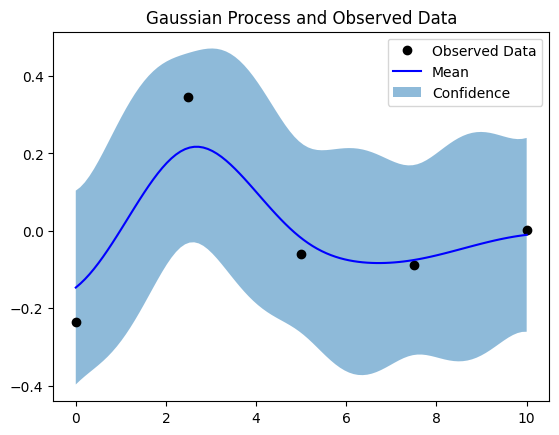

In [124]:
plot_gp_and_acquisition(transfer_GP, train_x, train_y, torch.tensor([[0.0], [10.0]]))